In [781]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.preprocessing import LabelEncoder

In [783]:
data=pd.read_csv(r"C:\Users\Ane\Downloads\dementia_patients_health_data.csv")
data

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,Donepezil,10.0,88,...,Never Smoked,Positive,Mild Activity,No,5,No,Balanced Diet,Poor,Diabetes,1
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,NaN,NaN,80,...,Never Smoked,Negative,Moderate Activity,No,9,Yes,Low-Carb Diet,Poor,Diabetes,0
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,NaN,NaN,67,...,Never Smoked,Positive,Sedentary,No,8,Yes,Balanced Diet,Good,Diabetes,0
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,Memantine,20.0,62,...,Never Smoked,Positive,Sedentary,Yes,2,No,Low-Carb Diet,Good,NaN,1


In [784]:
print(data.dtypes)

Diabetic                       int64
AlcoholLevel                 float64
HeartRate                      int64
BloodOxygenLevel             float64
BodyTemperature              float64
Weight                       float64
MRI_Delay                    float64
Prescription                  object
Dosage in mg                 float64
Age                            int64
Education_Level               object
Dominant_Hand                 object
Gender                        object
Family_History                object
Smoking_Status                object
APOE_ε4                       object
Physical_Activity             object
Depression_Status             object
Cognitive_Test_Scores          int64
Medication_History            object
Nutrition_Diet                object
Sleep_Quality                 object
Chronic_Health_Conditions     object
Dementia                       int64
dtype: object


In [785]:
data = data.drop(columns=['Education_Level', 'Dominant_Hand','MRI_Delay','Gender'])

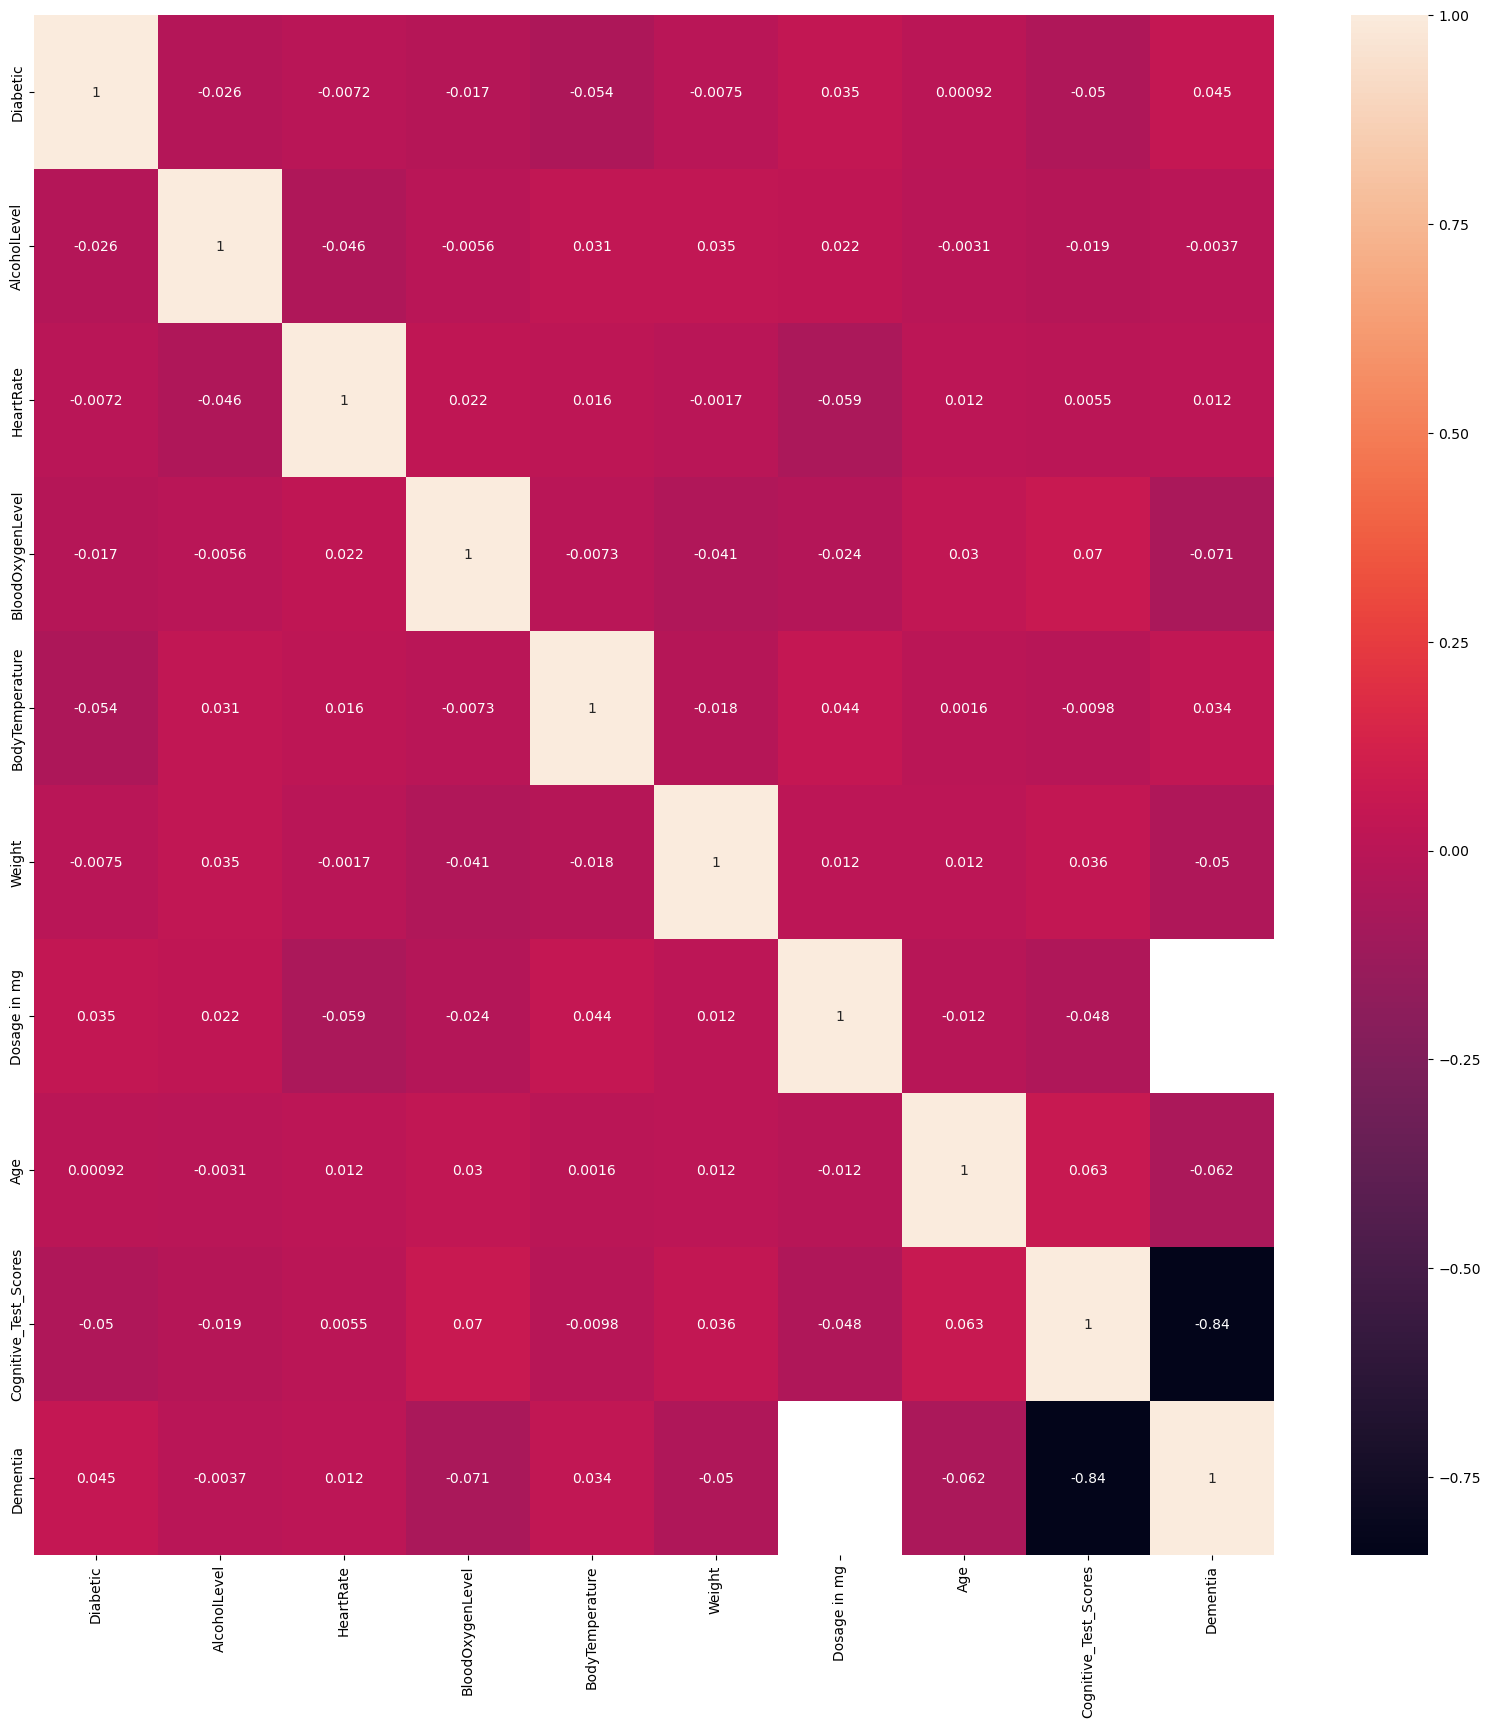

In [788]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.drop(columns=['Depression_Status','Medication_History','Sleep_Quality','APOE_ε4','Family_History','Prescription', 'Smoking_Status', 'Physical_Activity', 'Nutrition_Diet', 'Chronic_Health_Conditions']).corr(), annot=True)
plt.show()

In [789]:
data = data.drop(columns=['Dosage in mg','Weight','BodyTemperature','HeartRate','AlcoholLevel','BloodOxygenLevel','Age'])

In [790]:
data.isnull().sum()

Diabetic                       0
Prescription                 515
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions    179
Dementia                       0
dtype: int64

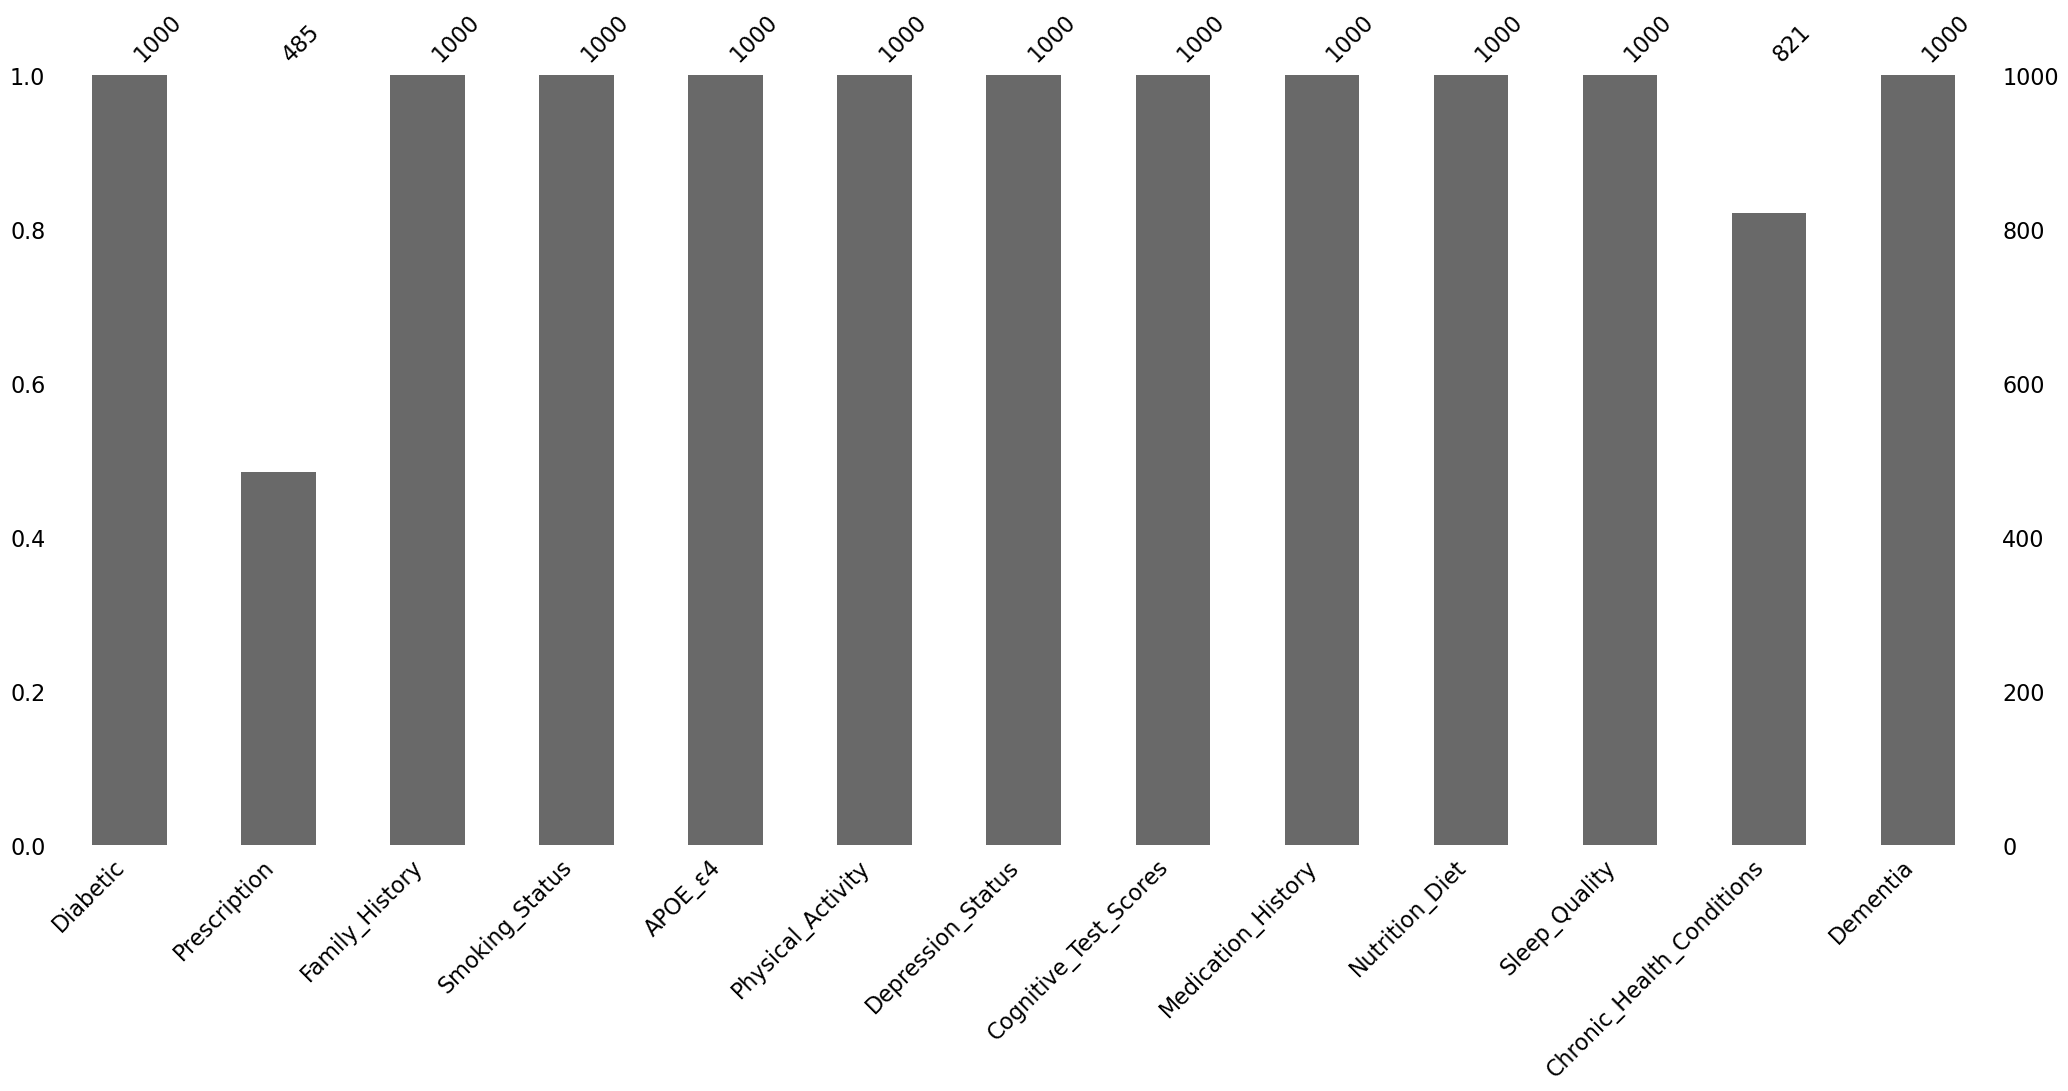

In [792]:
msno.bar(data)
plt.show()

In [793]:
data['Prescription'].unique()

array([nan, 'Galantamine', 'Donepezil', 'Memantine', 'Rivastigmine'],
      dtype=object)

In [794]:
data['Prescription'] = data['Prescription'].fillna('No Prescription')

In [795]:
data['Chronic_Health_Conditions'].unique()

array(['Diabetes', 'Heart Disease', 'Hypertension', nan], dtype=object)

In [796]:
data['Chronic_Health_Conditions']=data['Chronic_Health_Conditions'].fillna("No Chronic Condition")

In [797]:
data.isnull().sum()

Diabetic                     0
Prescription                 0
Family_History               0
Smoking_Status               0
APOE_ε4                      0
Physical_Activity            0
Depression_Status            0
Cognitive_Test_Scores        0
Medication_History           0
Nutrition_Diet               0
Sleep_Quality                0
Chronic_Health_Conditions    0
Dementia                     0
dtype: int64

In [798]:
data['Smoking_Status'].unique()

array(['Current Smoker', 'Former Smoker', 'Never Smoked'], dtype=object)

In [799]:
data

,Diabetic,Prescription,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,No Prescription,No,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,Galantamine,No,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,No Prescription,Yes,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,Donepezil,Yes,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,Memantine,Yes,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,Donepezil,Yes,Never Smoked,Positive,Mild Activity,No,5,No,Balanced Diet,Poor,Diabetes,1
996,1,No Prescription,No,Never Smoked,Negative,Moderate Activity,No,9,Yes,Low-Carb Diet,Poor,Diabetes,0
997,1,No Prescription,No,Never Smoked,Positive,Sedentary,No,8,Yes,Balanced Diet,Good,Diabetes,0
998,0,Memantine,Yes,Never Smoked,Positive,Sedentary,Yes,2,No,Low-Carb Diet,Good,No Chronic Condition,1


In [800]:
binary_columns=data[['Depression_Status','Medication_History','Sleep_Quality','APOE_ε4','Family_History']]

In [801]:
encoder=LabelEncoder()
for column in binary_columns:
    data[column]=encoder.fit_transform(data[column])

In [805]:
data

,Diabetic,Prescription,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,No Prescription,0,Current Smoker,0,Sedentary,0,10,0,Low-Carb Diet,1,Diabetes,0
1,0,Galantamine,0,Former Smoker,1,Moderate Activity,0,1,1,Low-Carb Diet,1,Heart Disease,1
2,0,No Prescription,1,Former Smoker,0,Moderate Activity,0,8,0,Mediterranean Diet,1,Heart Disease,0
3,0,Donepezil,1,Never Smoked,0,Mild Activity,1,5,1,Balanced Diet,1,Hypertension,1
4,1,Memantine,1,Never Smoked,1,Mild Activity,0,0,1,Low-Carb Diet,0,Diabetes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,Donepezil,1,Never Smoked,1,Mild Activity,0,5,0,Balanced Diet,1,Diabetes,1
996,1,No Prescription,0,Never Smoked,0,Moderate Activity,0,9,1,Low-Carb Diet,1,Diabetes,0
997,1,No Prescription,0,Never Smoked,1,Sedentary,0,8,1,Balanced Diet,0,Diabetes,0
998,0,Memantine,1,Never Smoked,1,Sedentary,1,2,0,Low-Carb Diet,0,No Chronic Condition,1


In [806]:
multi_columns = data[['Prescription', 'Smoking_Status', 'Physical_Activity', 'Nutrition_Diet', 'Chronic_Health_Conditions']]
for col in multi_columns:
    if col in data.columns:
        dummies = pd.get_dummies(data[col], prefix=col, dtype=int)
        data = pd.concat([data.drop(col, axis=1), dummies], axis=1)

In [817]:
data

,Diabetic,Family_History,APOE_ε4,Depression_Status,Cognitive_Test_Scores,Medication_History,Sleep_Quality,Dementia,Prescription_Donepezil,Prescription_Galantamine,...,Physical_Activity_Mild Activity,Physical_Activity_Moderate Activity,Physical_Activity_Sedentary,Nutrition_Diet_Balanced Diet,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Chronic_Health_Conditions_Diabetes,Chronic_Health_Conditions_Heart Disease,Chronic_Health_Conditions_Hypertension,Chronic_Health_Conditions_No Chronic Condition
0,1,0,0,0,10,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
1,0,0,1,0,1,1,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
2,0,1,0,0,8,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,0,1,0,1,5,1,1,1,1,0,...,1,0,0,1,0,0,0,0,1,0
4,1,1,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,0,5,0,1,1,1,0,...,1,0,0,1,0,0,1,0,0,0
996,1,0,0,0,9,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
997,1,0,1,0,8,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
998,0,1,1,1,2,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
from sklearn.feature_selection import mutual_info_classif
X_encoded = pd.get_dummies(data[['Prescription', 'Smoking_Status', 'Physical_Activity', 'Nutrition_Diet', 'Chronic_Health_Conditions']], drop_first=True)
y = data['Dementia']
info_gain = mutual_info_classif(X_encoded, y, discrete_features=True)
print(dict(zip(X_encoded.columns, info_gain)))#dali moze da isfrlame enkodirani vrednosti koi ne davaat korisni informacii vo predviduvanjeto

In [830]:
data.dtypes

Diabetic                                          int64
Family_History                                    int32
APOE_ε4                                           int32
Depression_Status                                 int32
Cognitive_Test_Scores                             int64
Medication_History                                int32
Sleep_Quality                                     int32
Dementia                                          int64
Prescription_Donepezil                            int32
Prescription_Galantamine                          int32
Prescription_Memantine                            int32
Prescription_No Prescription                      int32
Prescription_Rivastigmine                         int32
Smoking_Status_Current Smoker                     int32
Smoking_Status_Former Smoker                      int32
Smoking_Status_Never Smoked                       int32
Physical_Activity_Mild Activity                   int32
Physical_Activity_Moderate Activity             

In [832]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['Dementia'])
Y=data.Dementia
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [834]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [838]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=4, min_child_weight=3,  n_estimators=100 ,learning_rate=0.05)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [850]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        98

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

